# <font color='blue'>Week 5:</font>

# Presented by:

![EB](images/LogoEB.png)

# Agenda

- Neural Networks
- Problem at hand
- Mathematic Background
- Neural Network from Scratch
- What next ?

# Neural Networks

They are probably the most famous machine learning model to ever exist

** here are some of its uses**

## Neural Networks in health care

![Health_care](images/havel.jpg)

## Neural Networks in Manufacturing

![manufacturing](images/manufacturing.jpg)

## Neural Networks in image classification and object recognition

![image](images/image.jpg)

# Problem at hand

** In this session, we are going to create an Artificial neural network from scratch to look at images and predict if the images contain cats or not **

![cat](images/cat7.png)

### Let's start by importing some libraries and import our data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

data = pd.read_csv('data/data.csv')
data.head()

,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,...,b_1016,b_1017,b_1018,b_1019,b_1020,b_1021,b_1022,b_1023,b_1024,target
0,135,136,155,151,146,145,147,98,23,24,...,154,151,145,140,136,123,53,46,48,cat
1,19,21,86,173,208,224,227,227,237,237,...,25,31,33,27,23,25,28,35,37,no_cat
2,98,97,97,99,96,95,96,100,102,103,...,23,31,30,29,30,31,38,47,48,no_cat
3,231,221,211,208,210,209,208,207,207,207,...,188,188,188,188,188,188,187,187,187,no_cat
4,138,139,143,145,142,142,146,144,136,140,...,100,97,97,101,107,116,118,119,104,no_cat


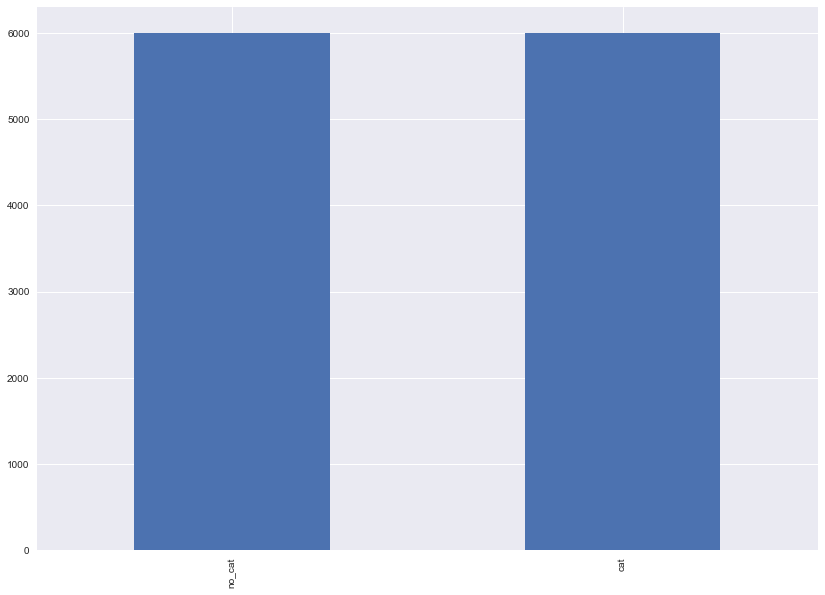

In [2]:
plt.figure(figsize=(14, 10))
data['target'].value_counts().plot.bar()
plt.show()

In [3]:
mapping = {'cat':1, 'no_cat':0}
data['target_n'] = data['target'].map(mapping)
data.head()

,r_1,r_2,r_3,r_4,r_5,r_6,r_7,r_8,r_9,r_10,...,b_1017,b_1018,b_1019,b_1020,b_1021,b_1022,b_1023,b_1024,target,target_n
0,135,136,155,151,146,145,147,98,23,24,...,151,145,140,136,123,53,46,48,cat,1
1,19,21,86,173,208,224,227,227,237,237,...,31,33,27,23,25,28,35,37,no_cat,0
2,98,97,97,99,96,95,96,100,102,103,...,31,30,29,30,31,38,47,48,no_cat,0
3,231,221,211,208,210,209,208,207,207,207,...,188,188,188,188,188,187,187,187,no_cat,0
4,138,139,143,145,142,142,146,144,136,140,...,97,97,101,107,116,118,119,104,no_cat,0


## How does our data work ?

### Here's what images actually look like

![rgb](images/rgb.jpg)

![rgb2](images/rgb2.jpg)

## For that matter, we choose to format our data as follows

![rbg_to_vec](images/rgb_to_vec.jpg)

In [4]:
from sklearn.utils import shuffle

data = shuffle(data, random_state=42)
X = data.drop(['target', 'target_n'], axis=1).astype('uint8')
y = data['target_n']

### We can try visualizing some of these images

In [5]:
def visualize_image(X, y, idx):
    rgb = X.iloc[idx]
    img = rgb.values.reshape(3, 32, 32).transpose([1, 2, 0])
    plt.figure(figsize=(4, 2))
    plt.imshow(img)
    plt.title('{}'.format(y.values[idx]))
    plt.show()

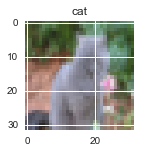

In [6]:
image_n = 18 # change me to see a different picture
visualize_image(X, data['target'], image_n)

# Mathematical Background

## Linear Algebra

### Let's start with some simple dot product ( produit scalaire )

** Hope your already know this one **

![dot](images/dot.jpg)

### Easy right ?

### Let's move up to something more serious

## Gradient Descent

### Let's suppose we have the following function
## $$ f(\theta) = \theta^2 $$

### we want to minimize such a function, in theory we just calculate its derivative and find the parameter theta for which f($\theta$) is null

### In practice however, we usually don't know what f looks like, and whenever f depends of more than one parameter or calculating its derivative become complicated, we try to approach $\theta$ that minimizes f with iterative methods

### One of these methods is the **Gradient Descent**:

## $$\theta_{k+1}=\theta_{k}-\alpha\frac{d f(\theta)}{d\theta}$$

## $\alpha$ : Learning rate
## $\frac{d f(\theta)}{d\theta}$ : Gradient of f
## $\theta_{k}$ : theta at the time step k
## $\theta_{k+1}$ : theta at the time step k+1

### Simply put, we start with an arbitrary value of $\theta$ and update it at each time step using the gradient of the function to minimize ( thus the name of the method )

### Below we implement a simple gradient descent to visualize how the process works on this simple example

In [7]:
theta = 3
alpha = 0.1
dat = []

for oo in range(0, 10):
    # code here
    derivative = 2 * theta
    direction = - derivative
    res = alpha * direction
    
    print('{:.4f} {:.4f}'.format(theta, res))
    dat.append([theta, theta**2])
    
    theta += res

3.0000 -0.6000
2.4000 -0.4800
1.9200 -0.3840
1.5360 -0.3072
1.2288 -0.2458
0.9830 -0.1966
0.7864 -0.1573
0.6291 -0.1258
0.5033 -0.1007
0.4027 -0.0805


### too hard to imagine ? we got your covered

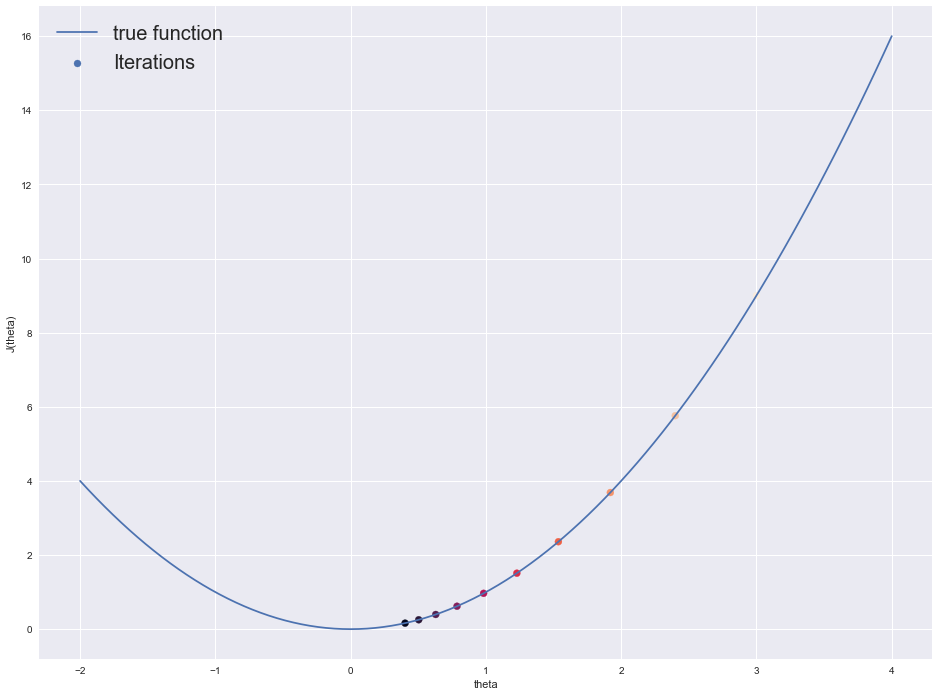

In [8]:
tmp = pd.DataFrame(dat)
plt.figure(figsize=(16, 12))
plt.plot(np.linspace(-2, 4, 100), np.linspace(-2, 4, 100)**2, label='true function')
plt.scatter(tmp[0], tmp[1], c=np.arange(10, 0, -1), marker='o', label='Iterations')
plt.legend(fontsize=20)
plt.xlabel('theta')
plt.ylabel('J(theta)')
plt.show()

# Neural Network from scratch

### You're probably wondering why we told you all of that right ? well rest assured, it is worth it.

### Let's start by having a quick look at a natural neuron

![natural](images/natural.jpg)

### Fascinated by its long mistery, humans started searching for means to model how our brain works since the end of the 18th century, however it is only in 1943 that the first model of our human brain was created by McCulloch and Pitts.

### The first model is roughly broken into two parts: a summation over weighted inputs and an output function of the sum.

![model](images/model.jpg)

## <font color='blue'>Forward Propagation</font>

### Let's not get scared ? let's start with some simple 2 neurons connection

![2](images/2.jpg)

### Following the previous model and assuming f is the identity we can say that
## $$ y = w x $$

### However, this equation suppose that if $x=0$ then $y=0$ so we will add a bias term to it

## $$ y = w x + b$$

### Now about that activation function:

### There is a multitude of activation functions, for this session we will focus on the Sigmoid function:

## $$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![sigmoid](images/sigmoid.png)

### We usually want to use such an activation function if we want each neuron to have an output between 0 and 1 like in our case ( cat vs no_cat )

### So each neuron will output the probability representing its confidence about the input image

### Let's implements that

In [9]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

### Thus the output of our neuron can be written as:

## $$ y_{pred} = \sigma(w x + b) $$

### where:
## $x$ : output of previous neuron
## $b$ : bias term
## $\sigma$ : sigmoid activation function
## $y_{pred}$ : output of neuron

### Pretty simple right ?
### Now how about we consider an input layer of multiple neurons ?

![3](images/3.jpg)

### This supposes that

## $$ y_{pred} = \sigma(\sum_i{w_{i} x_{i}} + b) $$ 

### But we don't think we covered the dot product for fun do you ?

### Let X be a matrix of shape (1 x n) and w a matrix of shape (n x 1) then

## $$ X . w = \sum_i{w_{i} x_{i}} $$

### We can then express the output of a neuron as

## $$ y_{pred} = \sigma(X . w + b) $$ 

### where:
## $X$ : input matrix of shape (m x n)
## $w$ : weights matrix of shape (n x l)
## $b$ : vector of shape (n x 1) or a simple scalar
## $y_{pred}$ : output matrix of shape (m x l)

### Let's go ahead and implement the forward propagation in a connection of m inputs and l outputs

In [10]:
def forward(X, w, b, f):
    """
    Function that implements the forward propagation
    
    Args:
        - X: input matrix of shape (m, n)
        - w: weights matrix of shape (n, l)
        - b: vector of shape (n,) or scalar
        - f: Callable, activation function
        
    Returns:
        - y: output matrix of shape (m, l)
    """
    
    return f(np.dot(X, w) + b)

### We told you everything is simple

### So consider now the following Neural Network

![network](images/network.png)

### To actually make predictions, we just feed in the inputs into the input layer and let the data propagate or "flow" through the network until it reaches the output layer and thus we got our prediction

![neural-network](images/neural-network.gif)

### But how does it learn exactly ??

## <font color='blue'>Back Propagation</font>

### When a neuron gives an output, we calculate its error using the following equation called Sum of Squared Errors (SSE):

## $$ E = \frac{1}{2} \sum_i{(y_{true, i} - y_{pred, i})^2} $$


### Artificial Neural Networks (ANN) learn by updating the connections between the neurons and thus by updating the weights matrix $w$ 

### This process is similar to the pathing procedure that our brain does when learning a new information, it creates a map through which the information propagates to make the best outcome

### Like we saw earlier, if we want to minimize some function we just have to adopt the gradient descent.

### In our case we are looking to minimize the "error" by changing the "weights" and so our gradient descent should look something like this:

## $$ w_{k+1} = w_k - \alpha \frac{d E(w)}{dw}$$

### There is a slight problem however, we don't see a direct link between E and w
### For that matter we use the chain rule and just derivate

## $$\frac{d E(w)}{dw} = \frac{d E(w)}{dy_{pred}}  \frac{d y_{pred}}{dw} $$

### But :
## $$  \frac{d E(w)}{dy_{pred}} =  \frac{d}{dy_{pred}} (\frac{1}{2} (y_{true} - y_{pred})^2) = - (y_{true} - y_{pred})$$

### So:

## $$\frac{d E(w)}{dw} =  - (y_{true} - y_{pred})  \frac{d y_{pred}}{dw} $$

### Chain rule again:

## $$ \frac{d E(w)}{dw} =  - (y_{true} - y_{pred}) \frac{d y_{pred}}{dh} \frac{d h}{dw} $$

### where:
## $h$ : weighted sum of previous neurons ( $h = X . w + b$)

### Since:

## $$ y_{pred} = \sigma (h) $$

### we can deduce that:

## $$ \frac{d y_{pred}}{dh} = \sigma '(h) $$

### thus, our equation becomes:

## $$ \frac{d E(w)}{dw} =  - (y_{true} - y_{pred}) \  \sigma '(h) \ \frac{d h}{dw} $$

### finally, since

## $$\frac{d h}{dw} = \frac{d(X w + b)}{dw} = X$$

### the error derivative become

## $$ \frac{d E(w)}{dw} =  - (y_{true} - y_{pred}) \  \sigma '(h) \ X \ \ \ \ \ \ \ (1)$$

### By bringing back the equation (1) to our gradient descent we get 

## $$ w_{k+1} = w_k + \alpha \ (y_{true} - y_{pred}) \  \sigma '(h) \ X$$

### By doing the same procedure considering the activation function of the bias as the identity we get

## $$ b_{k+1} = b_k + \alpha \ (y_{true} - y_{pred}) $$

### Enough of theory and mathematics, let's write this in code

### Knowing that:

## $$ \sigma'(x) = \sigma(x) ( 1 - \sigma(x))$$

### Let's redefine the sigmoid function

In [11]:
# we define the old sigmoid for your to develop on it
def old_sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid(x, deriv=False):
    """
    Sigmoidal Activation function
    
    Args:
     - x: vector or scaler, input to the sigmoid
     - deriv: boolean to specify if we want to use sigmoid or its derivative
     
     Returns:
     - y: scalar or vector, output of the sigmoid
    """
    if deriv:
        x = old_sigmoid(x)
        return x * (1 - x)
    return old_sigmoid(x)

### Let's go ahead to define the back propagation

In [12]:
def backward(y_true, y_pred, alpha, X, w, b):
    """
    Function to implement the back propagation
    
    Args:
        - y_true: scalar or vector, used to calculate error term
        - y_pred: scalar or vecotr, output of the forward propagation
        - alpha: float, learning rate
        - X: matrix, input of the synapse
        - w: matrix, weights of the synapse
        - b: scalar or vector, bias of the synapse
        
    Returns:
        - w: matrix, updated weights
        - b: vector or scalar: updated bias
    """
    h = np.dot(X, w) + b
    
    derivative_w = - X.T.dot(( y_true - y_pred ) * sigmoid(h, True))
    direction_w = - derivative_w
    
    derivative_b = - ( y_true - y_pred ).sum()
    direction_b = -derivative_b
    
    w += alpha * direction_w
    b += alpha * direction_b

    return w, b

### Now that we defined our forward propagation as well as out backward propagation, we can create the training function for our Network

### We will set some hyperparameters like:
### alpha: learning rate
### epochs: number of training steps ( each full forward and back propagation = 1 epoch )
### X: input matrix
### y: target vector

In [13]:
def train(X, y, alpha, epochs):
    """
    Training function of the network
    
    Args:
        - X: input matrix
        - y: output vector
        - alpha: learning rate
        - epochs: learning steps
        
    Returns:
        - w_: trained weights
        - b_: trained bias
        - cost_: list containing the cost function value at each training step
    """
    # we will define our starting weights and bias as 0
    np.random.seed(1)
    w_ = 2* np.random.random(X.shape[1]) -1 
    b_ = 0
    cost_ = []

    for i in range(1, epochs + 1):
        # make prediction
        y_pred = forward(X, w_, b_, sigmoid)
        
        # do the backpropagation using gradient descent
        w_, b_ = backward(y, y_pred, alpha, X, w_, b_)
        
        # do some plotting of the evolution of the error
        cost = ((y - y_pred)**2).sum() / 2.0
        
        if i % 10 == 0:
            print('Epoch : {} / {} , Cost = {:.2f}'.format(i, epochs, cost), end='\r')
        
        cost_.append(cost)
    return w_, b_, cost_

### let's define a function to plot the loss against training steps

### Let's also create a prediction function

In [14]:
def plot_error(epochs, cost):
    plt.figure(figsize=(10,8))
    plt.plot(range(1, epochs + 1), cost);
    plt.ylabel('SSE');
    plt.xlabel('Epoch');
    plt.show()

In [15]:
def predict(X, w, b, f):
    """
    Prediction function of the Network which rounds the predicted probability
    
    Args:
        - X: matrix to predict
        - w: trained weights
        - b: trained bias
        - f: activation function to use
    Returns:
        - y_pred: predicted outputs as an array of binary values
    """
    y_pred = forward(X, w, b, f)
    return np.round(y_pred).astype(int)

In [16]:
def prediction_str(X, w, b, f):
    y_pred = predict(X, w, b, f)
    return ['cat' if pred == 1 else 'no cat' for pred in y_pred]

### Let's try out our model

### We'll first start by doing some preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### We then create a train and test dataset, train our model and visualize its learning curve

Epoch : 8000 / 8000 , Cost = 1284.56
Training time: 353.6839771270752


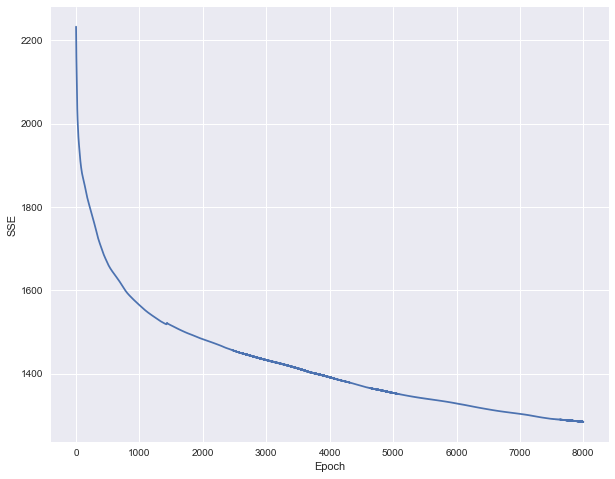

In [18]:
from sklearn.model_selection import train_test_split
from time import time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

alpha = 10**-4
epochs = 8000

start = time()
w, b, cost = train(X_train, y_train, alpha, epochs)
end = time()
print()
print('Training time: {}'.format(end-start))
plot_error(epochs, cost)

### Finally let's go ahead and make predictions on the train and test data and evaluate our model

In [19]:
from sklearn.metrics import accuracy_score

y_pred = predict(X_train, w, b, sigmoid)
print('Train Accuracy:', accuracy_score(y_train, y_pred))

Train Accuracy: 0.729375


In [20]:
y_pred = predict(X_test, w, b, sigmoid)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

Test Accuracy: 0.6425


# What Next ?

### As you noticed the results are not the best you could see, however don't forget we are only using One Neuron to make these predictions which seems to be very promising

### We could improve the results by creating a Neural Network with hidden layers


### One of the best practices is to try and understand the intuition behind neural networks, like by using this link:
## [Tensorflow Playground](http://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=16&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0.001&noise=20&networkShape=8,6,4&seed=0.38505&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)

# References

### We highly encourage you to visit these ressources as they go deeper into the explanation of all the concepts we covered and may explain some information we missed


- [Stanford Book](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf)
- [MIT course](https://www.youtube.com/watch?v=uXt8qF2Zzfo&t=1407s)
- [Gradient Descent Training Rule](http://www.idi.ntnu.no/~keithd/classes/advai/lectures/backprop.pdf)
- [Delta Rule](https://en.wikipedia.org/wiki/Delta_rule)
- [Step by Step BackPropagation](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/)
- [Coding Neural Networks from scratch in python and R](https://www.analyticsvidhya.com/blog/2017/05/neural-network-from-scratch-in-python-and-r/)

# <font color='blue'> Thank you for your Attention </font>